In [ ]:
# Upload csv file to colab for using it
import pandas as pd
from google.colab import files
upload_file = files.upload()

Saving ITEC610_assessment3_data.csv to ITEC610_assessment3_data.csv


In [ ]:
# use the uploaded file in colab
import io
import numpy as np
import matplotlib.pyplot as plt
assessment3 = pd.read_csv("ITEC610_assessment3_data.csv")
assessment3.head()

,Unnamed: 0,age,weight2,wtyrago,wtkg2,htm3,sex
0,0,39.0,88.636364,88.636364,88.64,180.0,1
1,1,64.0,75.000000,84.545455,75.00,155.0,2
2,2,87.0,61.818182,63.636364,61.82,NaN,2
3,3,51.0,100.000000,100.000000,100.00,183.0,1
4,4,35.0,63.636364,61.363636,63.64,170.0,2


In [ ]:
# view the details of the dataset to check if data contains null values
assessment3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414509 entries, 0 to 414508
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  414509 non-null  int64  
 1   age         410856 non-null  float64
 2   weight2     398484 non-null  float64
 3   wtyrago     390399 non-null  float64
 4   wtkg2       398484 non-null  float64
 5   htm3        409129 non-null  float64
 6   sex         414509 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 22.1 MB


In [ ]:
# Drop the column unnamed since it is just the serial number for the total data and is not relevant for the further steps
assessment3.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# again view data to check the changes
assessment3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414509 entries, 0 to 414508
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   age      410856 non-null  float64
 1   weight2  398484 non-null  float64
 2   wtyrago  390399 non-null  float64
 3   wtkg2    398484 non-null  float64
 4   htm3     409129 non-null  float64
 5   sex      414509 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 MB


In [ ]:
#Now after removing the unnamed column view descriptive information of the data for preprocessing
assessment3.describe()

,age,weight2,wtyrago,wtkg2,htm3,sex
count,410856.000000,398484.000000,390399.000000,398484.000000,409129.000000,414509.000000
mean,54.862180,78.992337,79.721319,78.992453,168.825190,1.624368
std,16.737702,19.546212,20.565164,19.546157,10.352653,0.484286
min,18.000000,20.000000,22.727273,20.000000,61.000000,1.000000
25%,43.000000,64.545455,64.545455,64.550000,160.000000,1.000000
50%,55.000000,77.272727,77.272727,77.270000,168.000000,2.000000
75%,67.000000,90.909091,90.909091,90.910000,175.000000,2.000000
max,99.000000,309.090909,342.272727,309.090000,236.000000,2.000000


In [ ]:
# After looking over the descriptive statistics table we find that replacing median of each column might be best option for filling over null values
columns_to_fill = ['age', 'weight2', 'wtyrago', 'wtkg2', 'htm3']
for column in columns_to_fill:
    assessment3[column] = assessment3[column].fillna(assessment3[column].median())

In [ ]:
#Now after preprocessing view the changes
assessment3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414509 entries, 0 to 414508
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  414509 non-null  int64  
 1   age         414509 non-null  float64
 2   weight2     414509 non-null  float64
 3   wtyrago     414509 non-null  float64
 4   wtkg2       414509 non-null  float64
 5   htm3        414509 non-null  float64
 6   sex         414509 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 22.1 MB


In [ ]:
# Task 1

In [ ]:
# summary statistics calculation
summary_statistics = {
    col: {
        'mean': assessment3[col].mean(),
        'median': assessment3[col].median(),
        'std': assessment3[col].std(),
        '25 perc': assessment3[col].quantile(0.25),
        '75 perc': assessment3[col].quantile(0.75),
        'min': assessment3[col].min(),
        'max': assessment3[col].max(),
    } for col in ['weight2', 'wtyrago', 'htm3']
}

In [ ]:
# plotting the required summary statistics calculation, renaming them
columns = {'weight2': 'Current weight', 'wtyrago': 'Weight a year ago', 'htm3': 'Height'}
x_positions = np.arange(len(columns))
width = 0.2

In [ ]:
# define the markers, colors, and positions for each statistic
stats_info = {
    'max': {'marker': 'v', 'color': 'black', 'offset': -2*width},
    'min': {'marker': '^', 'color': 'black', 'offset': -width},
    'mean': {'marker': '+', 'color': 'blue', 'offset': 0},
    'median': {'marker': 'x', 'color': 'blue', 'offset': width},
    'mean+std': {'marker': 'v', 'color': 'green', 'offset': 2*width},
    'mean-std': {'marker': '^', 'color': 'green', 'offset': 3*width},
    '75 perc': {'marker': 'v', 'color': 'red', 'offset': 4*width},
    '25 perc': {'marker': '^', 'color': 'red', 'offset': 5*width},
}

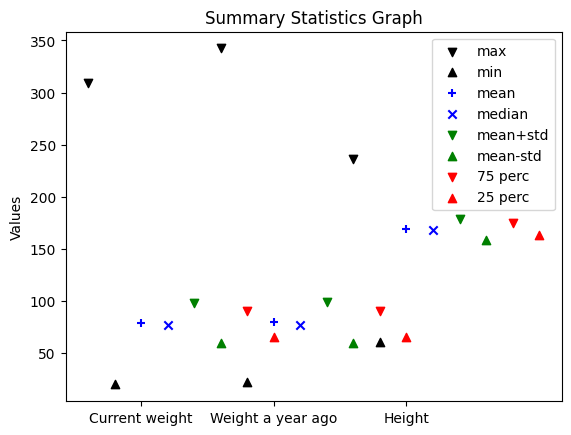

In [ ]:
# plotting the points, adding labels, legend, titles and finally visualizing the summary statistics graph
[plt.scatter(x_positions + info['offset'],
[summary_statistics[col][stat] if '+' not in stat and '-' not in stat else summary_statistics[col]['mean'] + summary_statistics[col]['std'] if '+' in stat else summary_statistics[col]
['mean'] - summary_statistics[col]['std'] for col in columns], marker=info['marker'], color=info['color'], label=stat) for stat, info in stats_info.items()]

plt.xticks(x_positions, list(columns.values()))
plt.ylabel('Values')
plt.title('Summary Statistics Graph')
plt.legend(loc='best')
plt.show()

In [ ]:
# Task 2

In [ ]:
#define weight_change and calculate correlations with weight change
assessment3['weight_change'] = assessment3['weight2'] - assessment3['wtyrago']
correlations = assessment3[['weight_change', 'weight2', 'wtyrago', 'age']].corr()
print(correlations['weight_change'])

weight_change    1.000000
weight2          0.093601
wtyrago         -0.294092
age             -0.072108
Name: weight_change, dtype: float64


In [ ]:
# determine which variable is most correlated with weight_change
most_correlated = correlations['weight_change'].drop('weight_change').idxmax()
print(f"The variable most correlated with weight_change is {most_correlated}")

The variable most correlated with weight_change is weight2


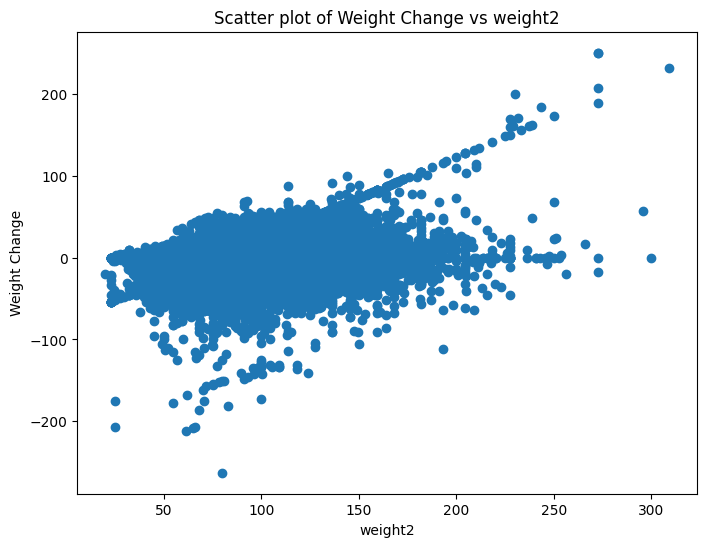

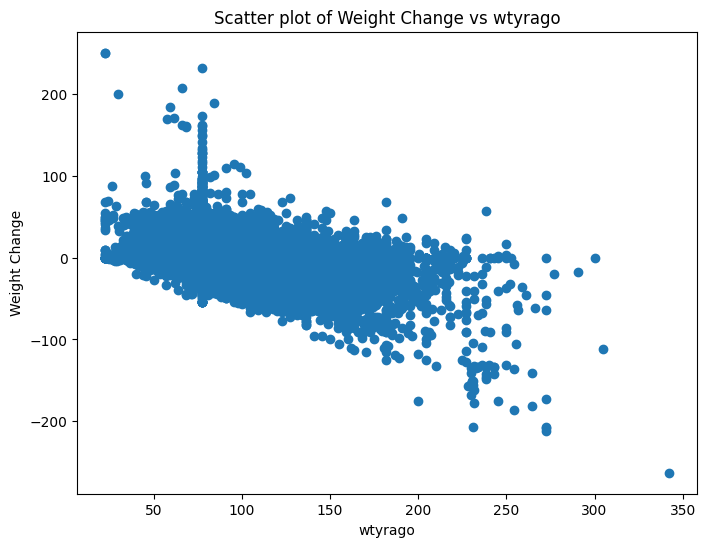

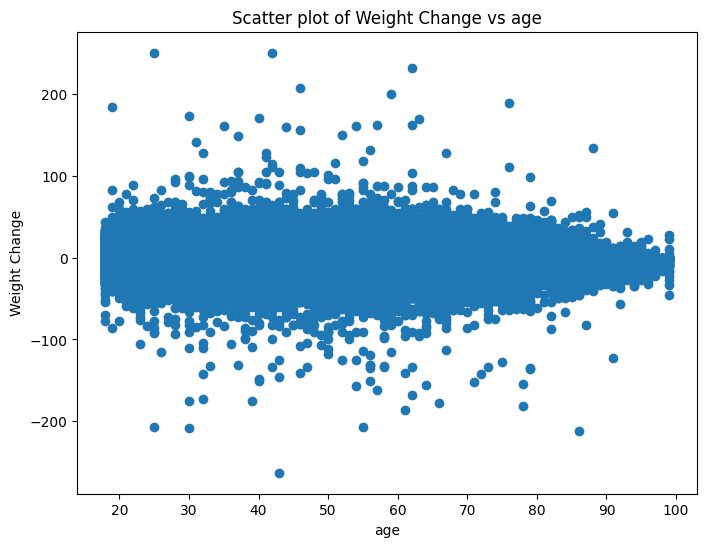

In [ ]:
# plot scatter plots
for col in ['weight2', 'wtyrago', 'age']:
    plt.figure(figsize=(8, 6))
    plt.scatter(assessment3[col], assessment3['weight_change'])
    plt.xlabel(col)
    plt.ylabel('Weight Change')
    plt.title(f'Scatter plot of Weight Change vs {col}')
    plt.show()

In [ ]:
# Task 3

In [ ]:
# linear regression model using scikit-learn, for training it on given house sizes and prices and predicts the price of a 2500 sqft house.
from sklearn.linear_model import LinearRegression
house_sizes = [[1500], [2000], [2500], [3000], [3500]]
house_prices = [250000, 300000, 330000, 360000, 390000]
model = LinearRegression()
model.fit(house_sizes, house_prices)
predicted_price = model.predict([[2500]])
print(f"For 2500 sqft area predicted house price is: {predicted_price[0]}")

For 2500 sqft area predicted house price is: 326000.0
